<a href="https://colab.research.google.com/github/superbunny38/2021DeepLearning/blob/main/papers/0214RunWithMyOwnTestData_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Why SN-Patch GAN is Better than SC FeGAN:


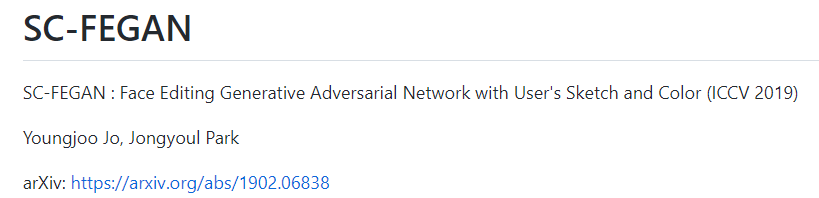

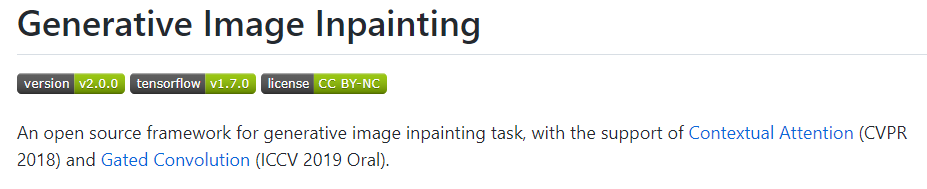

1. We(SN-PatchGAN) use a simple encoder-decoder network instead of U-Net. We found that skip connections in a U-Net have no significant effect for non-narrow mask. This is mainly because for center of a masked region, the inputs of these skip connections are almost zeros thus can not propagate detailed color or texture information to the decoder of that region.


2. Without compromise of performance, we also significantly simplify training objectives as two terms: a pixel-wise reconstruction loss and an adversarial loss.

In [ ]:
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import cv2

## Previously...

test with pretrained model command:

python test.py --image examples/places2/please.png --mask examples/places2/case1_mask.png --output examples/places2/please_output.png --checkpoint_dir model_logs/release_places2_256

test sample (input)

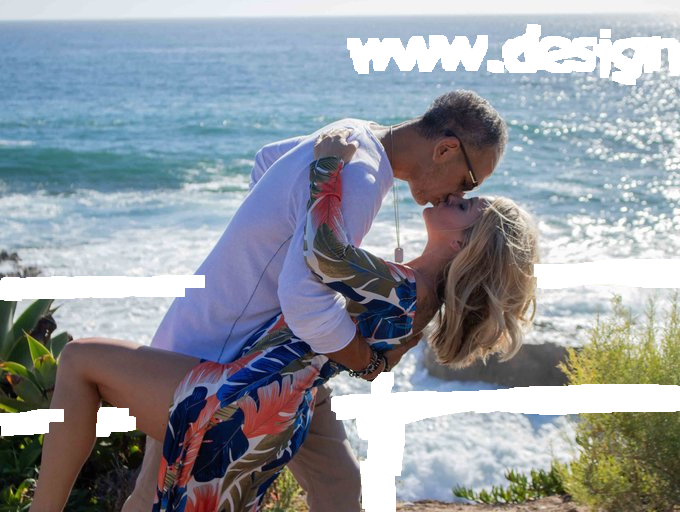

In [ ]:
case_img = Image.open("case1_input.png")
case_img

test sample (output)

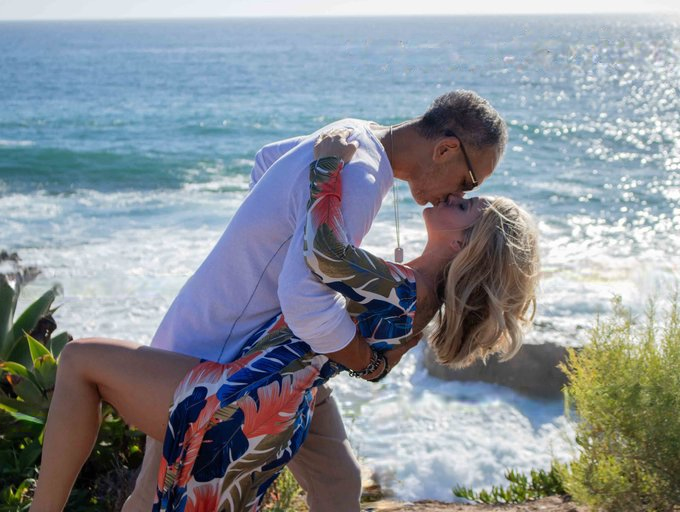

In [ ]:
out = load_img('case1_output.png')
out

my test data (input)

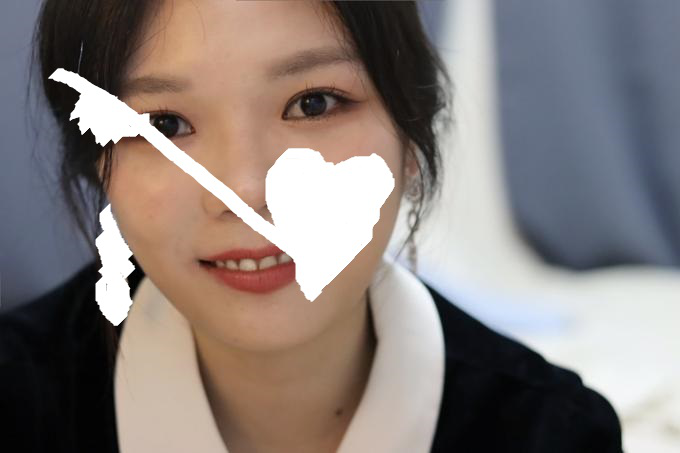

In [ ]:
im = load_img('please.png')
im

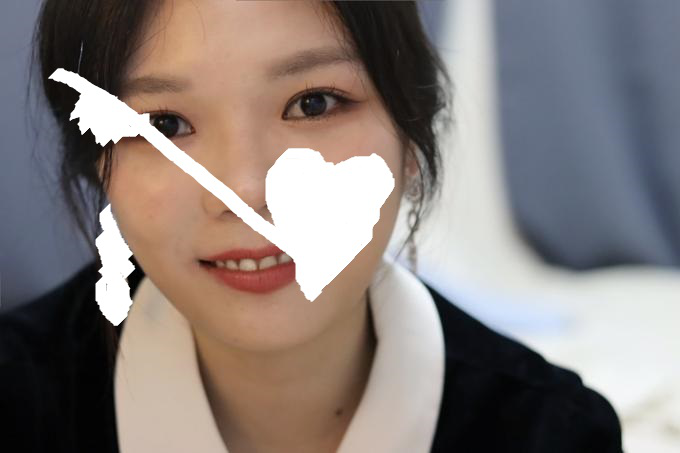

In [ ]:
im = load_img('please.png')
im

## The reason why it didn't work for my model

### issue about mask data
python test.py --image examples/places2/please.png <b>--mask examples/places2/case1_mask.png</b> --output examples/places2/please_output.png --checkpoint_dir model_logs/release_places2_256


two input data:
- input data with masked region
- mask data

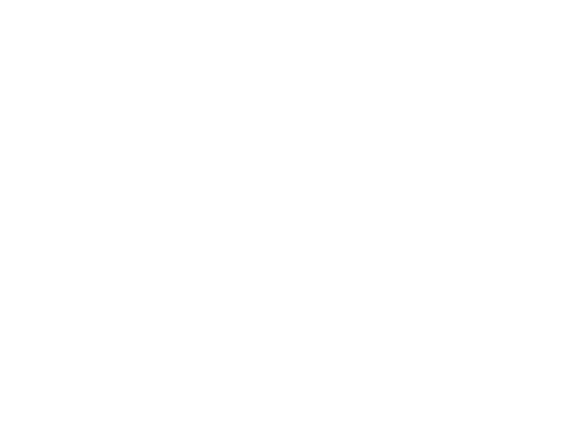

In [ ]:
load_img("mask_demo.JPG")

In [ ]:
np.array(load_img("case2_mask.png"))

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

editted the code to modify the mask data size to match the input data size, and initialized the pixel values with 0.

But, there were 255.0 values in the mask image, and not all zeros.

In [ ]:
np.sum(np.array(load_img("case2_mask.png")))

13066200

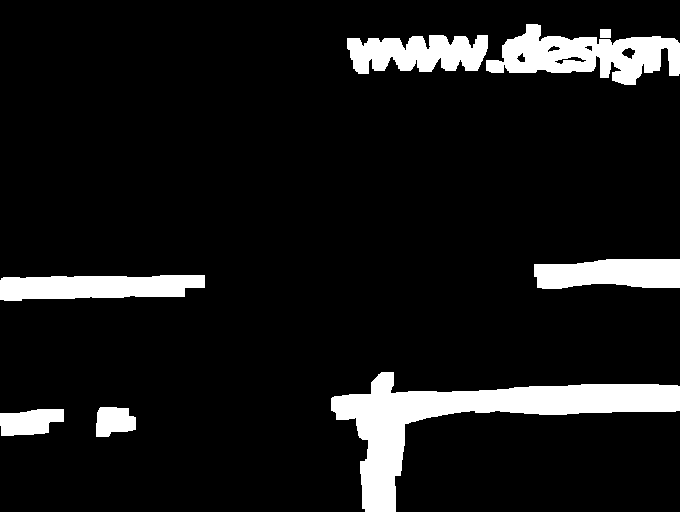

In [ ]:
load_img("case1_mask.png")

# Mask facial features and run test

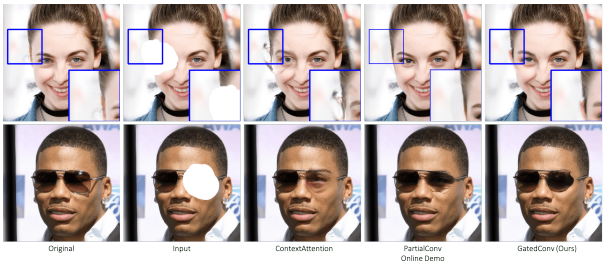


## Make matching mask data

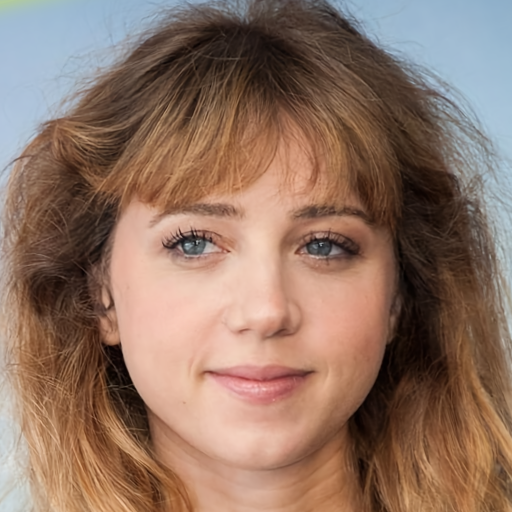

In [ ]:
load_img("00001.png")

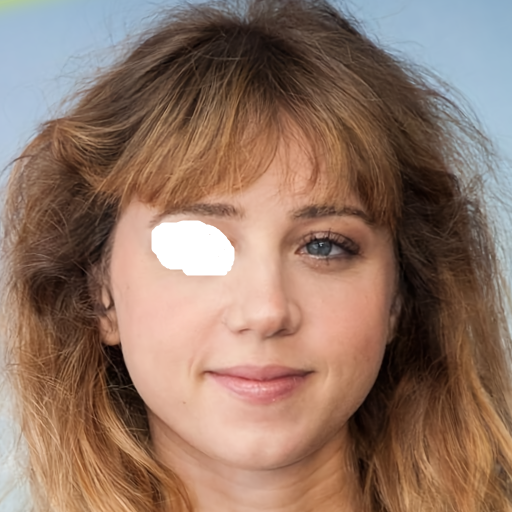

In [ ]:
load_img("eye.png")

In [ ]:
# original
original = np.array(Image.open("00001.png"))
# with mask
masked = np.array(Image.open("eye.png"))

In [ ]:
# jpg to png
original_png = np.concatenate((original, np.ones((original.shape[0], original.shape[1], 1))*255), axis=-1)
original_png = original_png.astype(np.uint8)

In [ ]:
original_png.shape

(512, 512, 4)

In [ ]:
# shape 확인
original_png.shape, masked.shape

((512, 512, 4), (512, 512, 4))

### create mask data

compare original input and masked input, if the pixel values from both source are the same, make the pixel value 0.0, else 255.0

In [ ]:
# generate a mask
mask = np.where((masked - original_png)==0, 0, 255)

In [ ]:
# save mask image
cv2.imwrite('please_mask.png', mask)

True

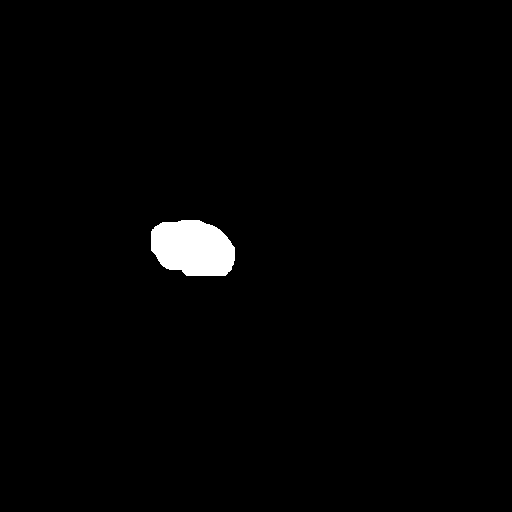

In [ ]:
load_img("please_mask.png")

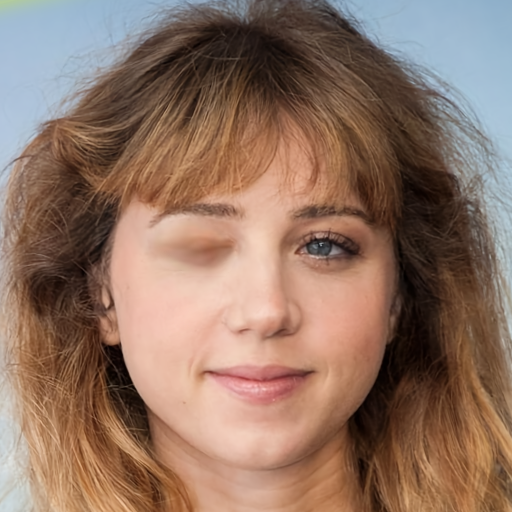

In [ ]:
im = Image.open('please_output.png')
im

Other tests

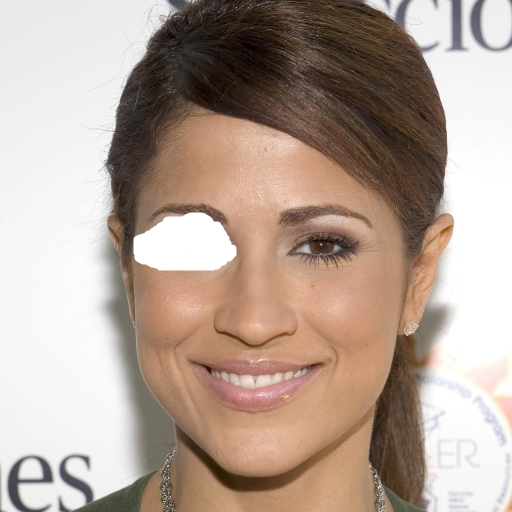

In [ ]:
load_img("eye2.png")

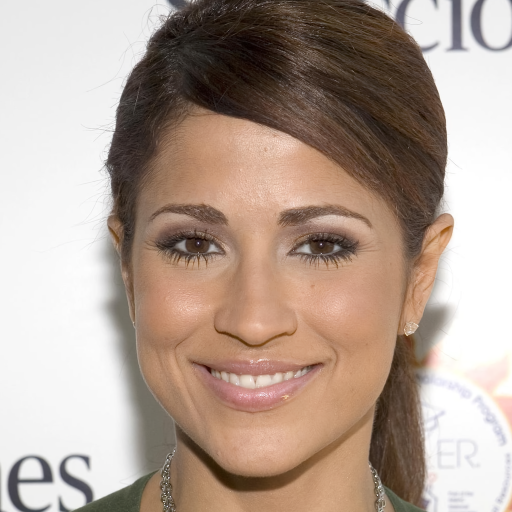

In [ ]:
load_img("00018.png")

In [ ]:
# original
original2 = np.array(Image.open("00018.png"))
# with mask
masked2 = np.array(Image.open("eye2.png"))

In [ ]:
# jpg to png
original = original2
original_png = np.concatenate((original, np.ones((original.shape[0], original.shape[1], 1))*255), axis=-1)
original_png = original_png.astype(np.uint8)

In [ ]:
# generate a mask
mask = np.where((masked2 - original_png)==0, 0, 255)

In [ ]:
# save mask image
cv2.imwrite('please_mask2.png', mask)

True

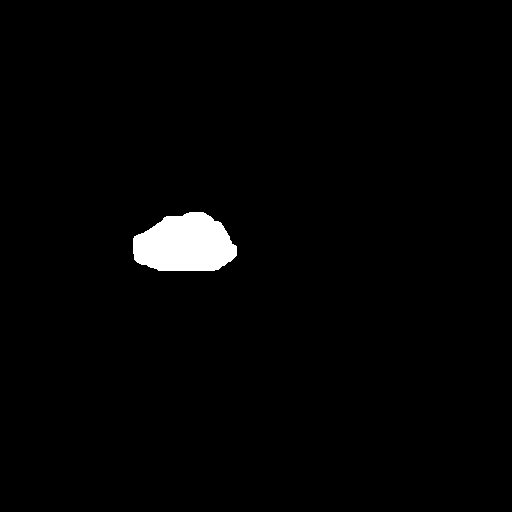

In [ ]:
load_img("please_mask2.png")

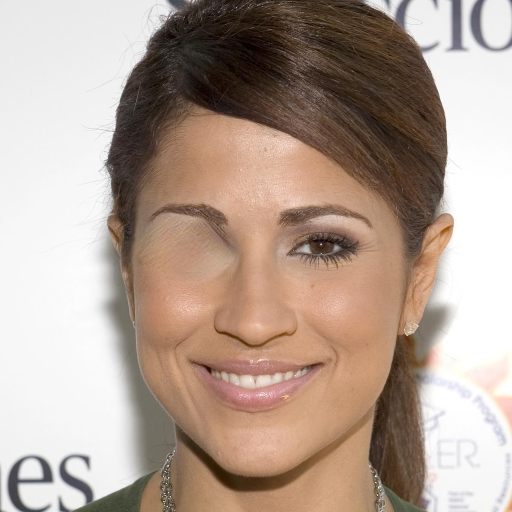

In [ ]:
load_img("please_output2.png")

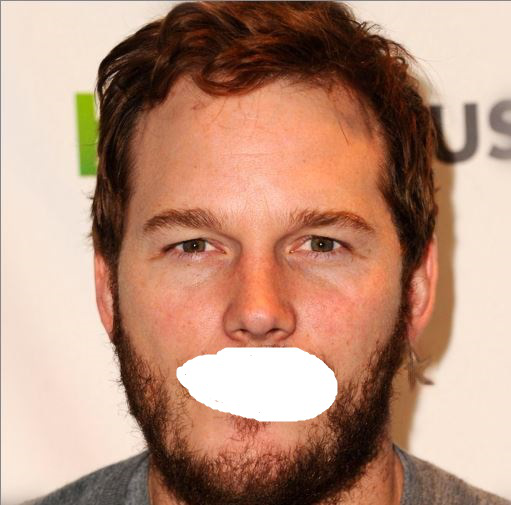

In [ ]:
load_img("mouth.jpg")

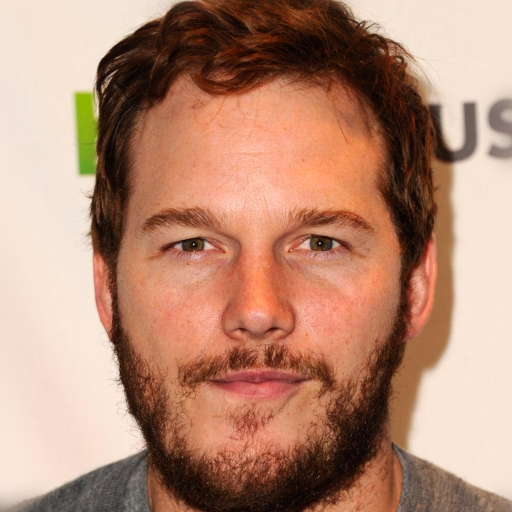

In [ ]:
load_img("00011.png")

In [ ]:
# original
original2 = np.array(Image.open("00011.png"))
# with mask
masked2 = np.array(Image.open("mouth.png"))

In [ ]:
# jpg to png
original = original2
original_png = np.concatenate((original, np.ones((original.shape[0], original.shape[1], 1))*255), axis=-1)
original_png = original_png.astype(np.uint8)

In [ ]:
masked2.shape

(512, 512, 4)

In [ ]:
original2.shape

(512, 512, 3)

In [ ]:
# generate a mask
mask = np.where((masked2 - original_png)==0, 0, 255)

In [ ]:
# save mask image
cv2.imwrite('please_mask3.png', mask)

True

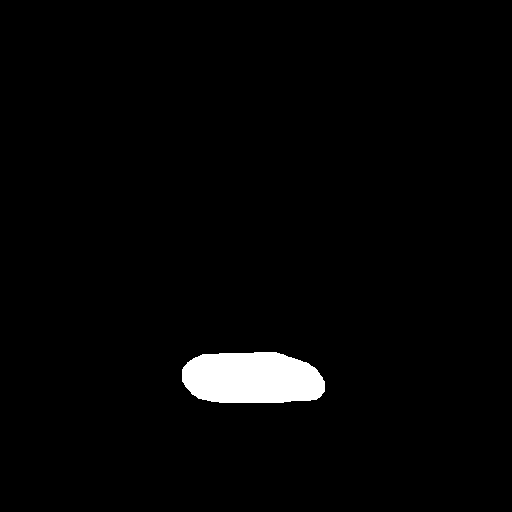

In [ ]:
load_img("please_mask3.png")

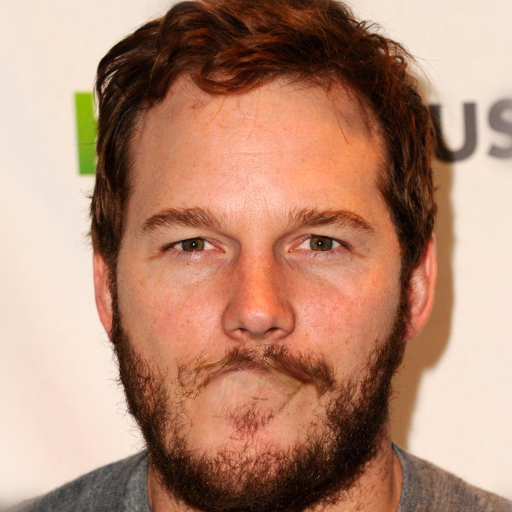

In [ ]:
load_img("please_output3.png")

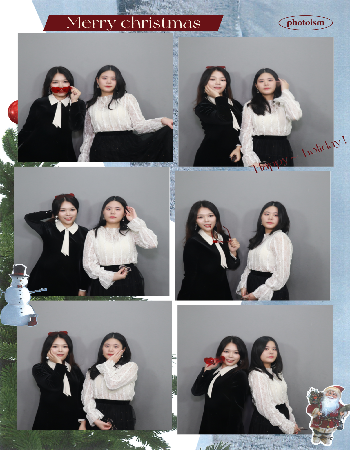

In [ ]:
load_img("photoism1.png", target_size=(450,350))

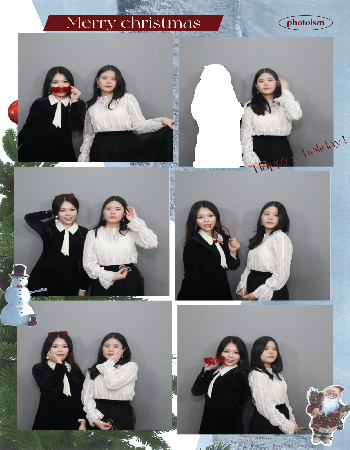

In [ ]:
load_img("person.png",target_size=(450,350))

In [ ]:
# original
original2 = np.array(Image.open("photoism1.png"))
# with mask
masked2 = np.array(Image.open("person.png"))
# jpg to png
original = original2
original_png = np.concatenate((original, np.ones((original.shape[0], original.shape[1], 1))*255), axis=-1)
original_png = original_png.astype(np.uint8)
# generate a mask
mask = np.where((masked2 - original_png)==0, 0, 255)
# save mask image
cv2.imwrite('please_mask4.png', mask)

True

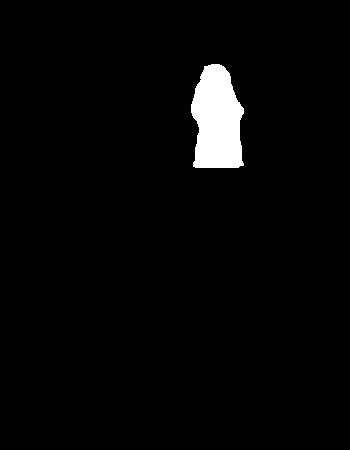

In [ ]:
load_img("please_mask4.png",target_size=(450,350))

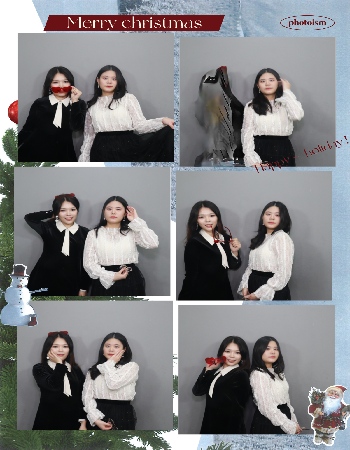

In [ ]:
load_img("please_output4.png",target_size=(450,350))

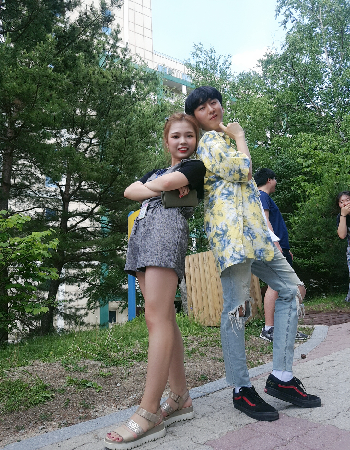

In [ ]:
load_img("all.png",target_size=(450,350))

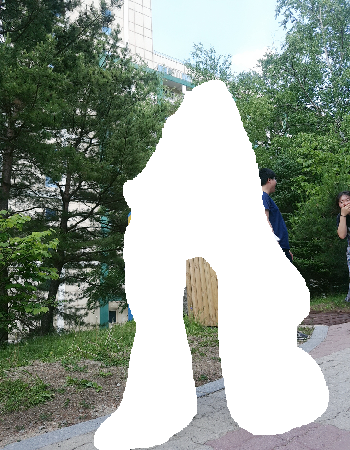

In [ ]:
load_img("without.png",target_size=(450,350))

In [ ]:
# original
original2 = np.array(Image.open("all.png"))
# with mask
masked2 = np.array(Image.open("without.png"))
# jpg to png
original = original2
original_png = np.concatenate((original, np.ones((original.shape[0], original.shape[1], 1))*255), axis=-1)
original_png = original_png.astype(np.uint8)
# generate a mask
mask = np.where((masked2 - original_png)==0, 0, 255)
# save mask image
cv2.imwrite('please_mask5.png', mask)

True

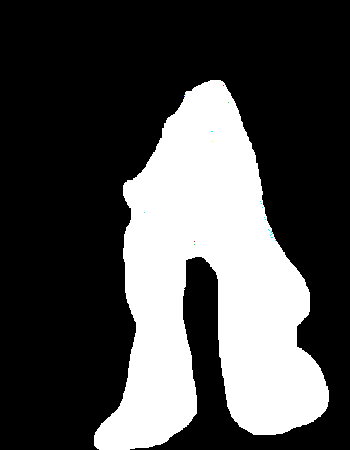

In [ ]:
load_img("please_mask5.png",target_size=(450,350))

하늘색이 왜 나오지...?

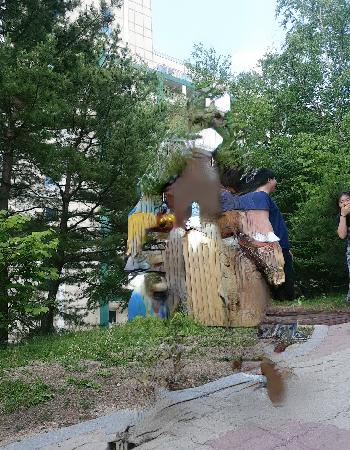

In [ ]:
load_img("please_output5.png",target_size=(450,350))